In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def draw_coins_simulator(number_of_draws, iterations):
    draw = np.random.uniform(0, 1, size=(iterations, number_of_draws))
    draw[np.logical_and(draw>=0.0, draw<0.2)] = 0.01
    draw[np.logical_and(draw>=0.2, draw<0.4)] = 0.05
    draw[np.logical_and(draw>=0.4, draw<0.6)] = 0.10
    draw[np.logical_and(draw>=0.6, draw<0.8)] = 0.25
    draw[np.logical_and(draw>=0.8, draw<1.0)] = 0.50
    return draw

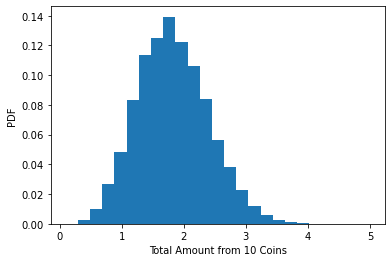

In [3]:
number_of_draws = 10
iterations = int(5e7)
draw = draw_coins_simulator(number_of_draws, iterations)

weights = np.ones_like(draw.sum(axis=-1)) / iterations
plt.hist(draw.sum(axis=-1), bins=25, weights=weights)
plt.xlabel('Total Amount from 10 Coins')
plt.ylabel('PDF')
plt.show()

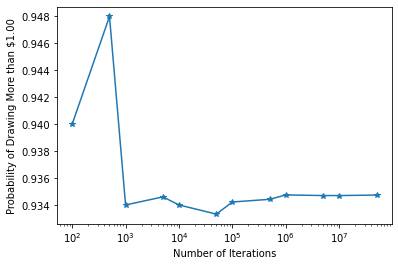

In [6]:
threshold = 1
results = (draw.sum(axis=-1) >= threshold).astype('int')

x = [int(1e2), int(5e2), int(1e3), int(5e3), int(1e4), int(5e4), int(1e5), int(5e5),
     int(1e6), int(5e6), int(1e7), int(5e7)]
y = [results[:i].sum()/i for i in x]
plt.plot(x, y, '-*')
plt.xlabel('Number of Iterations')
plt.xscale('log')
plt.ylabel('Probability of Drawing More than ${:.2f}'.format(threshold))
plt.show()

In [8]:
threshold = 1
results = (draw.sum(axis=-1) >= threshold).astype('int')
answer = results.sum()/iterations
print('The probability that you will be able to buy an item for ${}.00 is {:.5f}'.format(threshold, answer))

The probability that you will be able to buy an item for $1.00 is 0.93474


In [9]:
threshold = 2
results = (draw.sum(axis=-1) >= threshold).astype('int')
answer = results.sum()/iterations
print('The probability that you will be able to buy an item for ${}.00 is {:.5f}'.format(threshold, answer))

The probability that you will be able to buy an item for $2.00 is 0.36705


In [35]:
number_of_draws = 20
iterations = int(1e7)
draw = draw_coins_simulator(number_of_draws, iterations)

In [36]:
item_cost = 0.25
results = (draw.sum(axis=-1) >= item_cost).astype('int')
answer = results.sum()/iterations
print('The probability that you will be able to buy an item for ${:.2f} is {:.5f}'.format(item_cost, answer))

# Making sure that (virtually) all case will guarantee to draw enough coins to buy the item.

The probability that you will be able to buy an item for $0.25 is 1.00000


In [37]:
get_back = np.cumsum(draw, axis=-1) - item_cost
get_back = np.where(get_back >= 0, get_back, 999).min(axis=-1)
get_back = get_back[get_back != 999]  # For the (almost impossible) occasion that we don't draw enough coins
print('The expected amount you get back when the item costs ${:.2f} is: {:.5f}'.format(item_cost, get_back.mean()))
print('The STV of the amount you get back when the item costs ${:.2f} is: {:.5f}'.format(item_cost, get_back.std()))

The expected amount you get back when the item costs $0.25 is: 0.16298
The STV of the amount you get back when the item costs $0.25 is: 0.14181


In [38]:
item_cost = 1.00
results = (draw.sum(axis=-1) >= item_cost).astype('int')
answer = results.sum()/iterations
print('The probability that you will be able to buy an item for ${:.2f} is {:.5f}'.format(item_cost, answer))

# Making sure that (virtually) all case will guarantee to draw enough coins to buy the item.

The probability that you will be able to buy an item for $1.00 is 0.99998


In [40]:
get_back = np.cumsum(draw, axis=-1) - item_cost
get_back = np.where(get_back >= 0, get_back, 999).min(axis=-1)
get_back = get_back[get_back != 999]  # For the (almost impossible) occasion that we don't draw enough coins
print('The expected amount you get back when the item costs ${:.2f} is: {:.5f}'.format(item_cost, get_back.mean()))
print('The STV of the amount you get back when the item costs ${:.2f} is: {:.5f}'.format(item_cost, get_back.std()))

The expected amount you get back when the item costs $1.00 is: 0.15722
The STV of the amount you get back when the item costs $1.00 is: 0.13981


In [44]:
number_of_draws = 100
iterations = int(1e6)
draw = draw_coins_simulator(number_of_draws, iterations)

In [45]:
item_cost = 10.0
results = (draw.sum(axis=-1) >= item_cost).astype('int')
answer = results.sum()/iterations
print('The probability that you will be able to buy an item for ${:.2f} is {:.5f}'.format(item_cost, answer))

# Making sure that (virtually) all case will guarantee to draw enough coins to buy the item.

The probability that you will be able to buy an item for $10.00 is 1.00000


In [46]:
get_back = np.cumsum(draw, axis=-1) - item_cost
get_back = np.where(get_back >= 0, get_back, 999).min(axis=-1)
get_back = get_back[get_back != 999]  # For the (almost impossible) occasion that we don't draw enough coins
print('The expected amount you get back when the item costs ${:.2f} is: {:.5f}'.format(item_cost, get_back.mean()))
print('The STV of the amount you get back when the item costs ${:.2f} is: {:.5f}'.format(item_cost, get_back.std()))

The expected amount you get back when the item costs $10.00 is: 0.18274
The STV of the amount you get back when the item costs $10.00 is: 0.14157
